# **10. Multi-level Models, Repeated Measures and Time Series**

## **10.1 Multi-Level Models, Including Repeated Measures Models**


In modeling, we distinguish between fixed effects, which represent average differences across groups or conditions, and random effects, which capture variability that is specific to certain groups or conditions. For instance, in an inter-laboratory comparison, variations between laboratories and between observers within laboratories are considered random effects. The fixed effect in this case would be the overall mean across all laboratories and observers.

The `lme()` and `nlme()` functions from the `nlme` package by Pinheiro and Bates are useful for constructing models that incorporate both fixed and random effects, particularly in scenarios involving repeated measures. In statistical terms, `lme` handles linear models while `nlme` extends to non-linear models. The functionality provided by `lme` version 3 is comparable to SAS's `Proc Mixed`, a popular procedure for mixed models.

These functions are equipped with diagnostic tools and various plots that aid in model validation and interpretation. Repeated measures models, which these functions support, are closely related to time series models. In time series, we typically observe one series over many time points. In contrast, repeated measures involve multiple short series, each representing different conditions or subjects, observed across a smaller number of time points.

This distinction underscores how `lme()` and `nlme()` facilitate the analysis of data that exhibit both within-group correlations (due to repeated measures) and between-group variations (modeled as random effects). They are valuable tools for understanding complex data structures where multiple sources of variability need to be accounted for simultaneously.

**10.1.1 The Kiwifruit Shading Data, Again**

Refer back to section 5.8.2 for details of these data. The fixed effects are block and treatment (shade). The
random effects are block (though making block a random effect is optional, for purposes of comparing
treatments), plot within block, and units within each block/plot combination. Here is the analysis:

In [2]:
library(nlme)
kiwishade <- read.csv("/content/kiwishade (1).csv")
kiwishade$plot<-factor(paste(kiwishade$block, kiwishade$shade,
 sep="."))
kiwishade.lme<-lme(yield~shade,random=~1|block/plot, data=kiwishade)
summary(kiwishade.lme)

Linear mixed-effects model fit by REML
  Data: kiwishade 
       AIC      BIC    logLik
  265.9663 278.4556 -125.9831

Random effects:
 Formula: ~1 | block
        (Intercept)
StdDev:    2.019373

 Formula: ~1 | plot %in% block
        (Intercept) Residual
StdDev:    1.478623 3.490381

Fixed effects:  yield ~ shade 
                 Value Std.Error DF  t-value p-value
(Intercept)  103.23333  1.761617 36 58.60146  0.0000
shadeDec2Feb -13.31250  1.867621  6 -7.12805  0.0004
shadeFeb2May -10.45917  1.867621  6 -5.60026  0.0014
shadenone     -3.03083  1.867621  6 -1.62283  0.1558
 Correlation: 
             (Intr) shdD2F shdF2M
shadeDec2Feb -0.53               
shadeFeb2May -0.53   0.50        
shadenone    -0.53   0.50   0.50 

Standardized Within-Group Residuals:
        Min          Q1         Med          Q3         Max 
-2.41538976 -0.59814252 -0.06899575  0.78046182  1.58909233 

Number of Observations: 48
Number of Groups: 
          block plot %in% block 
              3           

In [3]:
anova(kiwishade.lme)

,numDF,denDF,F-value,p-value
,<int>,<dbl>,<dbl>,<dbl>
(Intercept),1,36,5190.55984,0.000000000
shade,3,6,22.21119,0.001194224


In [4]:
# This was a balanced design, which is why section 5.8.2 could use aov(). We can get an output summary that is
# helpful for showing how the error mean squares match up with standard deviation information given above thus:

intervals(kiwishade.lme)

Approximate 95% confidence intervals

 Fixed effects:
                  lower       est.      upper
(Intercept)   99.660609 103.233333 106.806058
shadeDec2Feb -17.882405 -13.312500  -8.742595
shadeFeb2May -15.029072 -10.459167  -5.889262
shadenone     -7.600738  -3.030833   1.539072

 Random Effects:
  Level: block 
                    lower     est.    upper
sd((Intercept)) 0.5472669 2.019373 7.451334
  Level: plot 
                    lower     est.   upper
sd((Intercept)) 0.3697214 1.478623 5.91344

 Within-group standard error:
   lower     est.    upper 
2.770648 3.490381 4.397079 

We are interested in the three standard deviation estimates. By squaring the standard deviations and converting them to variances, we obtain the following table:

|                        | Variance component | Notes                               |
|------------------------|--------------------|-------------------------------------|
| block                  | 2.0192 =4.076            | Three blocks                |
| plot                   | 1.4792 =2.186            | 4 plots per block           |
| residual (within group)| 3.4902 =12.180            | 4 vines (subplots) per plot)|


This information provides the necessary components for an analysis of variance (ANOVA) table:

|                       | Variance component   | Mean square for anova table | d.f.  |
|-----------------------|----------------------|-----------------------------|-------|
| block                 | 4.076                | 12.180 + 4 *2.186 + 16  4.076 = 86.14                       | 2(3-1)   |
| plot                  | 2.186                | 12.180 + 4 *2.186 = 20.92                       | 6 (3-1)(2-1)   |
| residual (within gp)  | 12.180               | 12.18                       | 3*4(4-1)  |




In [5]:
# Now fsee where these same pieces of information appeared in the analysis of variance table of section 5.8.2:

 kiwishade.aov<-aov(yield~block+shade+Error(block:shade),data=kiwishade)
 summary(kiwishade.aov)

Warning message in aov(yield ~ block + shade + Error(block:shade), data = kiwishade):
“Error() model is singular”



Error: block:shade
          Df Sum Sq Mean Sq F value  Pr(>F)   
block      2  172.3    86.2   4.118 0.07488 . 
shade      3 1394.5   464.8  22.211 0.00119 **
Residuals  6  125.6    20.9                   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Error: Within
          Df Sum Sq Mean Sq F value Pr(>F)
Residuals 36  438.6   12.18               

**10.1.2 The Tinting of Car Windows**

In section 4.1 of our study, we analyzed data from an experiment focusing on how tinted car windows affect visual performance, especially when looking through side windows. The dataset, named "tinting," includes variables like csoa (time in milliseconds to recognize a target), it (time for a simple discrimination task), and age. Tint and target are ordered factors with 3 and 2 levels, respectively. The variable "sex" is coded 1 for males and 2 for females, while "agegp" is coded 1 for young adults in their early 20s and 2 for older participants in their early 70s.

Our analysis considers two levels of variation: within individuals (each tested under different tint and target conditions) and between individuals. Therefore, we treat "id" (individual identifier) as a random effect. As observed in section 4.1, to ensure roughly equal variances, we transform variables like log(csoa) and log(it). Here, we focus on analyzing log(it). Initially, we start with a comprehensive model that includes all possible interactions, although the final model might be simpler depending on the results.

In [11]:
tinting <- read.csv("/content/tinting.csv")
itstar.lme<-lme(log(it)~tint*target*agegp*sex,
 random=~1|id, data=tinting,method="ML")

#  A reasonable guess is that first order interactions may be all we need, i.e.
it2.lme<-lme(log(it)~(tint+target+agegp+sex)^2,
 random=~1|id, data=tinting,method="ML")
#  Finally, there is the very simple model, allowing only for main effects:
it1.lme<-lme(log(it)~(tint+target+agegp+sex),
 random=~1|id, data=tinting,method="ML")
# Note that we have fitted all these models by maximum likelihood. This is so that we can do the equivalent of an
# analysis of variance comparison. Here is what we get:
anova(itstar.lme,it2.lme,it1.lme)

,call,Model,df,AIC,BIC,logLik,Test,L.Ratio,p-value
,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<dbl>,<dbl>
itstar.lme,"lme.formula(fixed = log(it) ~ tint * target * agegp * sex, data = tinting, random = ~1 | id, method = ""ML"")",1,26,8.146187,91.45036,21.926906,,NA,NA
it2.lme,"lme.formula(fixed = log(it) ~ (tint + target + agegp + sex)^2, data = tinting, random = ~1 | id, method = ""ML"")",2,17,-3.742883,50.72523,18.871441,1 vs 2,6.11093,0.728766684
it1.lme,"lme.formula(fixed = log(it) ~ (tint + target + agegp + sex), data = tinting, random = ~1 | id, method = ""ML"")",3,8,1.138171,26.77022,7.430915,2 vs 3,22.88105,0.006469052


In [13]:
# The model that limits attention to first order interactions is adequate. We will need to examine the first order
# interactions individually. For this we re-fit the model used for it2.lme, but now with method="REML".
it2.reml<-update(it2.lme,method="REML")

# We now examine the estimated effects:
options(digits=3)
summary(it2.reml)$tTable

# Because tint is an ordered factor, polynomial contrasts are used.

,Value,Std.Error,DF,t-value,p-value
(Intercept),4.0087,0.1996,145,20.08,1.03e-43
tintlo,-0.2435,0.0798,145,-3.05,2.71e-03
tintno,-0.2825,0.0719,145,-3.93,1.31e-04
targetlocon,0.3249,0.0692,145,4.69,6.13e-06
agegpyounger,-0.4533,0.2368,22,-1.91,6.87e-02
sexm,0.4246,0.2368,22,1.79,8.67e-02
tintlo:targetlocon,-0.0739,0.0696,145,-1.06,2.91e-01
tintno:targetlocon,-0.1300,0.0651,145,-2.00,4.78e-02
tintlo:agegpyounger,0.1778,0.0754,145,2.36,1.97e-02
tintno:agegpyounger,0.1849,0.0696,145,2.66,8.74e-03


**10.1.3 The Michelson Speed of Light Data**


Here's an example using the Michelson speed of light data from the MASS package by Venables and Ripley. The model allows the speed of light measurements to vary linearly across different experimental runs (1 to 20). The slope of this variation is allowed to vary randomly between five experiments, each consisting of 20 runs.

We assume there is a first-order autoregressive dependence structure, meaning each measurement depends on the one before it. The variance of measurements can also differ between experiments. Maximum likelihood tests have shown that this complexity in both variance and dependence structure is necessary to accurately represent the data.

Statistically, a model that includes neither fixed nor random effects for the experimental runs appears sufficient. To test this statistically, one would fit models with and without these effects, using the method="ML" option, and compare their likelihoods (an exercise left for the reader!).

It's important to note that ignoring the sequential dependence entirely can lead to misleading results when analyzing such data.

In [14]:
library(MASS) # Load the MASS package if not already loaded
michelson$Run <- as.numeric(michelson$Run) # Ensure Run is treated as numeric

# Fit the linear mixed-effects model
mich.lme1 <- lme(fixed = Speed ~ Run,
                 data = michelson,
                 random = ~ Run | Expt,
                 correlation = corAR1(form = ~ 1 | Expt),
                 weights = varIdent(form = ~ 1 | Expt))

# Print summary of the model
summary(mich.lme1)


Linear mixed-effects model fit by REML
  Data: michelson 
   AIC  BIC logLik
  1115 1143   -546

Random effects:
 Formula: ~Run | Expt
 Structure: General positive-definite, Log-Cholesky parametrization
            StdDev   Corr  
(Intercept) 7.92e-03 (Intr)
Run         1.10e-04 0     
Residual    1.27e+02       

Correlation Structure: AR(1)
 Formula: ~1 | Expt 
 Parameter estimate(s):
  Phi 
0.589 
Variance function:
 Structure: Different standard deviations per stratum
 Formula: ~1 | Expt 
 Parameter estimates:
    1     2     3     4     5 
1.000 0.368 0.649 0.550 0.519 
Fixed effects:  Speed ~ Run 
            Value Std.Error DF t-value p-value
(Intercept)   882     23.31 94    37.8   0.000
Run            -3      1.88 94    -1.7   0.095
 Correlation: 
    (Intr)
Run -0.847

Standardized Within-Group Residuals:
    Min      Q1     Med      Q3     Max 
-2.9116 -0.7093  0.0772  0.7043  1.8696 

Number of Observations: 100
Number of Groups: 5 

## **10.2 Time Series Models**


The R stats package offers several functions for working with time series data, including manipulation, plotting, and calculating autocorrelation.

1. **Time Domain Methods**: These methods focus on models where the autocorrelation function (ACF) between observations decreases rapidly to zero. Traditional "short memory" models fall into this category. Recently, "long memory" models have been developed where the ACF decays very slowly over time. Long memory models exhibit variation at multiple temporal scales, from days to centuries.

2. **Frequency Domain Methods**: These methods, such as the `spectrum()` function, are used for spectral analysis. They analyze the frequency components present in a time series.

Specific Functions in R:
- **stl()**: Decomposes a time series into its trend, seasonal components, and residual.
- **ar()**: Fits autoregressive (AR) models for short memory time series.
- **arima0()**: Fits autoregressive integrated moving average (ARIMA) models, which include both AR and MA components.
- **gls()**: Available in the `nlme` package, fits complex models with autoregressive, ARIMA, and other dependencies.

Note: R does not currently provide functions for fitting the more advanced long memory models.

These functions enable users to analyze time series data effectively, whether they are interested in short-term patterns or exploring more complex dependencies.

## **10.3 Exercises**

1. Use the function acf() to plot the autocorrelation function of lake levels in successive years in the data set
huron. Do the plots both with type=”correlation” and with type=”partial”.

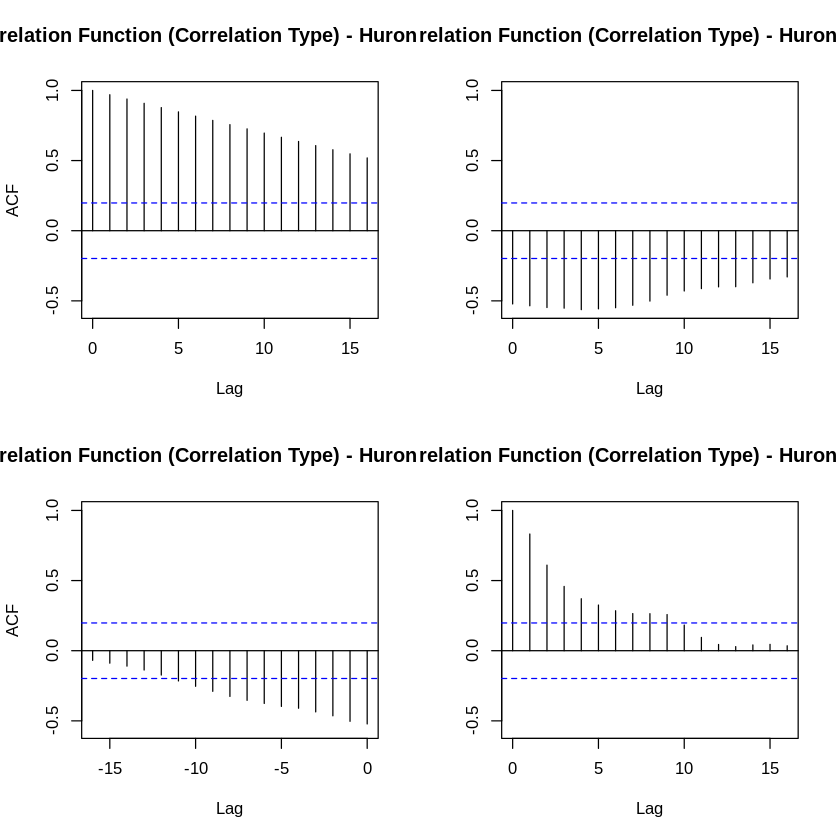

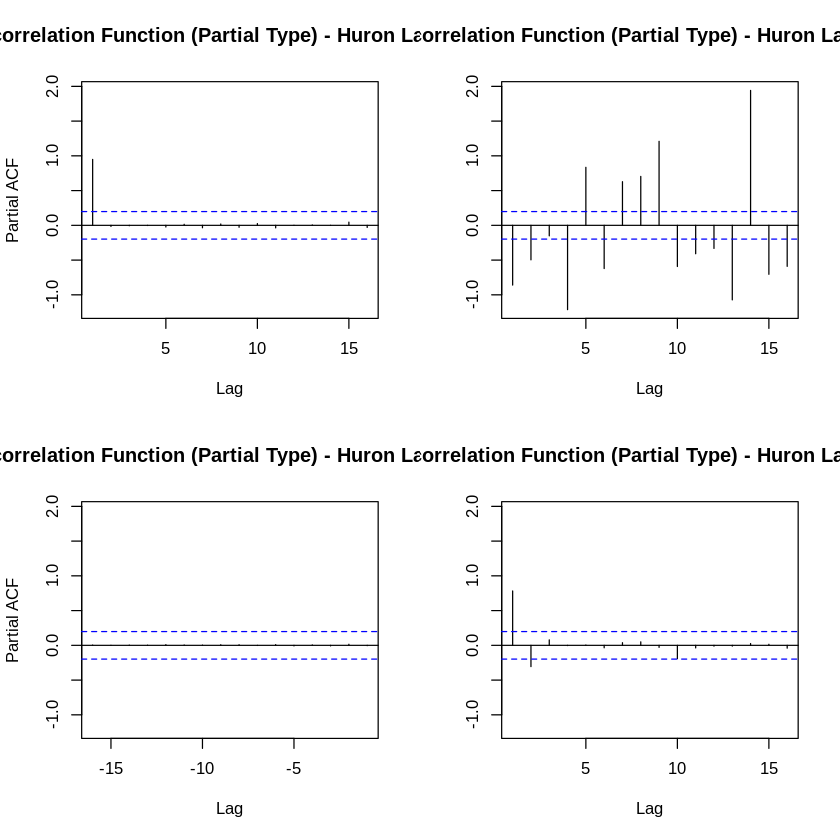

In [16]:
# Load the necessary package if not already loaded
library(datasets)

# Load the dataset
huron <- read.csv("/content/LakeHuron (1).csv")

# Plot autocorrelation function (ACF) with type="correlation"
acf(huron, type = "correlation", main = "Autocorrelation Function (Correlation Type) - Huron Lake Levels")

# Plot autocorrelation function (ACF) with type="partial"
acf(huron, type = "partial", main = "Autocorrelation Function (Partial Type) - Huron Lake Levels")


## **10.4 References**


Chambers, J. M. and Hastie, T. J. 1992. Statistical Models in S. Wadsworth and Brooks Cole Advanced Books
and Software, Pacific Grove CA.

Diggle, Liang & Zeger 1996. Analysis of Longitudinal Data. Clarendon Press, Oxford.

Everitt, B. S. and Dunn, G. 1992. Applied Multivariate Data Analysis. Arnold, London.

Hand, D. J. & Crowder, M. J. 1996. Practical longitudinal data analysis. Chapman and Hall, London.

Little, R. C., Milliken, G. A., Stroup, W. W. and Wolfinger, R. D. (1996). SAS Systems for Mixed Models. SAS Institute
Inc., Cary, New Carolina.

Maindonald J H and Braun W J 2003. Data Analysis and Graphics Using R – An Example-Based Approach.
Cambridge University Press.

Pinheiro, J. C. and Bates, D. M. 2000. Mixed effects models in S and S-PLUS. Springer, New York.

Venables, W. N. and Ripley, B. D., 2nd edn 1997. Modern Applied Statistics with S-Plus. Springer, New York.